#Stock Price Prediction with Facebook Prophet Model

Facebook Prophet Model é um modelo open source capiteneado pelo Facebook que visa gerar modelos de séries temporais.

Mais informações sobre este modelo podem ser acessadas no link abaixo.

https://facebook.github.io/prophet/



In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web

!pip install yfinance
import yfinance as yf

!pip install fbprophet
from fbprophet import Prophet

In [ ]:
yf.pdr_override()

btc = web.get_data_yahoo("BTC-USD", set_index = True)

#btc["Data"] = btc.index

btc.reset_index(level = 0, inplace = True, drop = False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = btc[["Date", "Close"]] #ajustando o banco para que o modelo possa compreende-l
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2014-09-17    457.334015
1    2014-09-18    424.440002
2    2014-09-19    394.795990
3    2014-09-20    408.903992
4    2014-09-21    398.821014
...         ...           ...
2859 2022-07-16  21190.316406
2860 2022-07-17  20779.343750
2861 2022-07-18  22485.689453
2862 2022-07-19  23389.433594
2863 2022-07-21  23294.474609

[2864 rows x 2 columns]


In [ ]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = prophet.make_future_dataframe(periods=365)
print(future)

             ds
0    2014-09-17
1    2014-09-18
2    2014-09-19
3    2014-09-20
4    2014-09-21
...         ...
3224 2023-07-17
3225 2023-07-18
3226 2023-07-19
3227 2023-07-20
3228 2023-07-21

[3229 rows x 1 columns]


In [ ]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
3029,2023-01-03,43108.904946,34549.846716,52149.740890
3030,2023-01-04,43197.925331,34667.967692,51712.857439
3031,2023-01-05,43108.405198,34346.402000,52022.438306
3032,2023-01-06,43147.779759,34539.937251,52172.307376
3033,2023-01-07,43138.954638,34209.339918,52007.841584
...,...,...,...,...
3224,2023-07-17,40654.115035,28207.007495,54467.593830
3225,2023-07-18,40804.301501,27564.465052,54303.024020
3226,2023-07-19,41047.580830,26983.098473,54490.183283
3227,2023-07-20,41133.122194,27957.480235,54602.164248


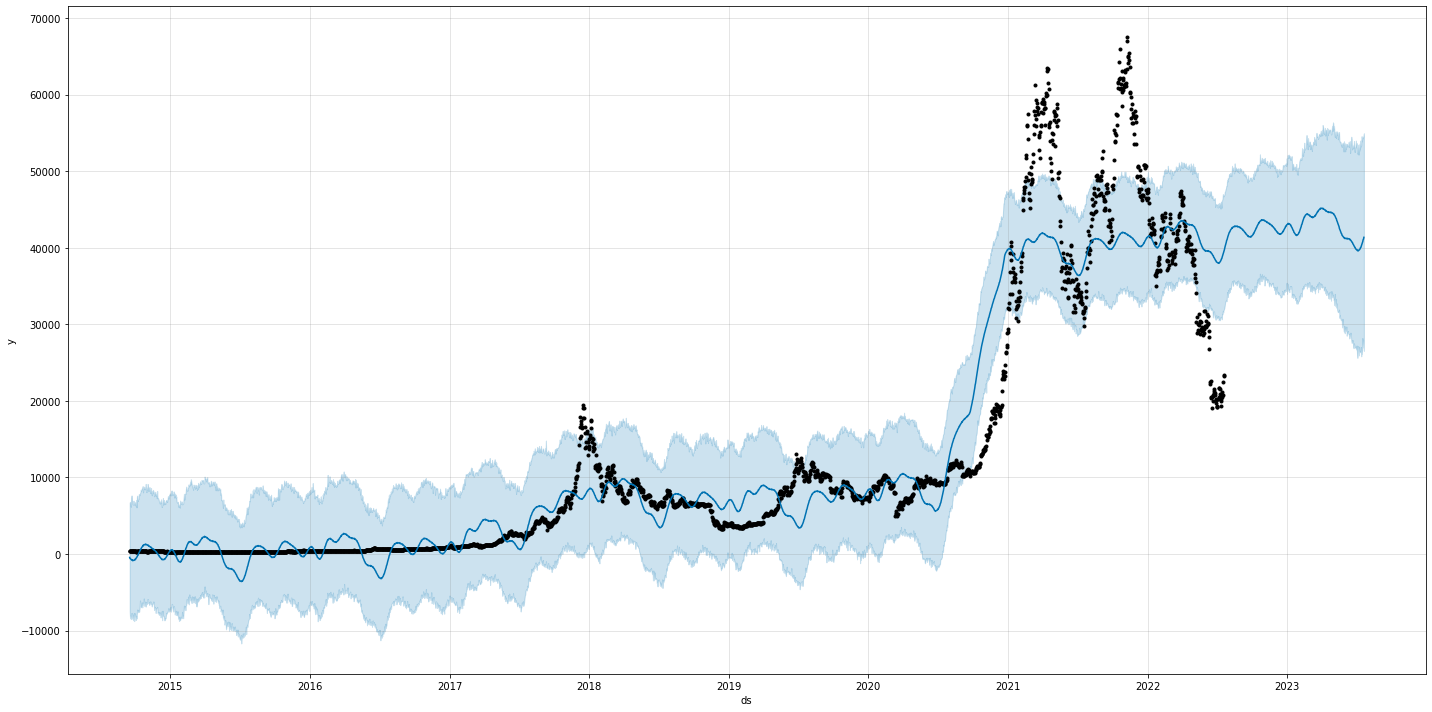

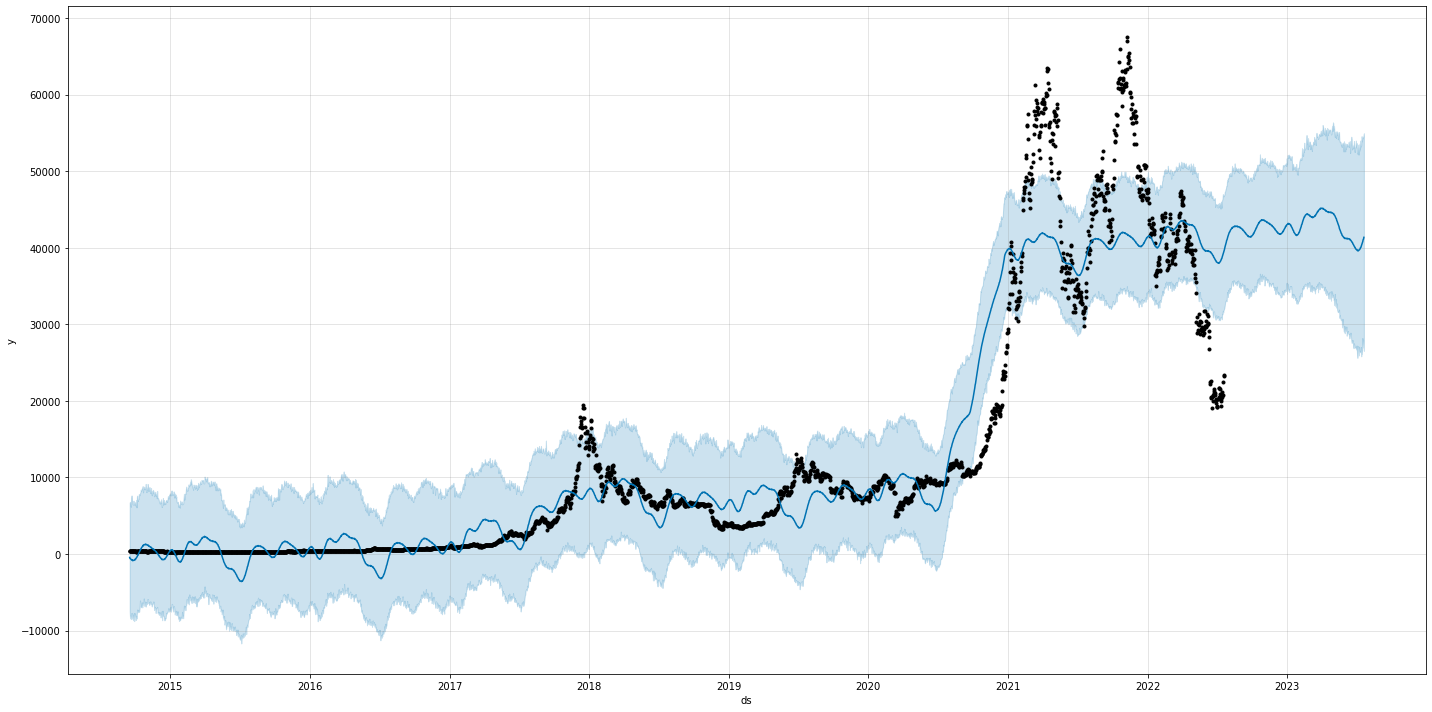

In [ ]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))